In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

%matplotlib inline  
output_notebook()

Loading BokehJS ...

In [2]:
# import datasets
subscribers = pd.read_csv('data/subscribers.csv')
links = pd.read_csv('data/clicks.csv')
messages = pd.read_csv('data/messages.csv')
content = pd.read_csv('data/content.csv')

In [3]:
# key ratios & cleaning
messages['send_date'] = pd.to_datetime(messages['sent_at'], unit='s')
messages['open_rate'] = messages['unique_opens'] / messages['send_count']
messages['click_rate'] = messages['unique_clicks'] / messages['send_count']
messages['click_rate_by_open'] = messages['unique_clicks'] / messages['unique_opens']
messages['total_clicks_per_send'] = messages['total_clicks'] / messages['send_count']
messages['clicks_per_unique_click'] = messages['total_clicks'] / messages['unique_clicks']


In [4]:
messages

,id,subject,to_list,status,send_count,queue_count,created_at,updated_at,sent_at,stub,...,total_opens,spam_complaints,unique_opens,send_time,send_date,open_rate,click_rate,click_rate_by_open,total_clicks_per_send,clicks_per_unique_click
0,8852110,"NYC Data #217: NYPL, History of the CSV, ML fo...",NaN,sent,1318,0,1608712753,1608817575,1608817552,nyc-data-217-nypl-history-of-the-csv-ml-for-cu...,...,961,0,631,2020-12-24 13:45:52,2020-12-24 13:45:52,0.478756,0.152504,0.318542,0.740516,4.855721
1,8832530,"NYC Data #216: Spotify Analytics Engineering, ...",NaN,sent,1310,0,1607855645,1607953066,1607953048,nyc-data-216-spotify-analytics-engineering-nyc...,...,1071,0,648,2020-12-14 13:37:28,2020-12-14 13:37:28,0.494656,0.196183,0.396605,1.018321,5.190661
2,8819234,"NYC Data #215: Mt. Sinai Genetics, Data Scienc...",NaN,sent,1307,0,1607286560,1607346551,1607346527,nyc-data-215-mt-sinai-genetics-data-science-ca...,...,1185,0,733,2020-12-07 13:08:47,2020-12-07 13:08:47,0.560826,0.218822,0.390177,1.037490,4.741259
3,8803454,"NYC Data #214: World Food Programme, ML model ...",NaN,sent,1296,0,1606671094,1606742967,1606742936,nyc-data-214-world-food-programme-ml-model-sha...,...,1167,0,685,2020-11-30 13:28:56,2020-11-30 13:28:56,0.528549,0.208333,0.394161,1.080247,5.185185
4,8773614,"NYC Data #213: Two Sigma, NakedWines, Da Vinci...",NaN,sent,1279,0,1605403680,1605623531,1605623495,nyc-data-213-two-sigma-nakedwines-da-vinci-s-t...,...,1095,0,590,2020-11-17 14:31:35,2020-11-17 14:31:35,0.461298,0.186083,0.403390,0.971071,5.218487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2171633,NYC Data Jobs #4: SmartAsset,NaN,sent,71,0,1454051533,1454690740,1454690734,nyc-data-jobs-4-smartasset,...,84,0,52,2016-02-05 16:45:34,2016-02-05 16:45:34,0.732394,0.183099,0.250000,0.450704,2.461538
204,2149649,NYC Data Jobs #3: Quartet Health,NaN,sent,60,0,1453807123,1454086482,1454086475,nyc-data-jobs-3-quartet-health,...,88,0,50,2016-01-29 16:54:35,2016-01-29 16:54:35,0.833333,0.283333,0.340000,0.733333,2.588235
205,2135565,"NYC Data Jobs #2: Paypal, Stripe",NaN,sent,57,0,1453326441,1453848840,1453482400,nyc-data-jobs-2-paypal-stripe,...,93,0,49,2016-01-22 17:06:40,2016-01-22 17:06:40,0.859649,0.368421,0.428571,1.298246,3.523810
206,2132377,"NYC Data Jobs #1: CrowdTwist, Greatist, Gov. O...",NaN,sent,19,0,1453228395,1453234981,1453234969,nyc-data-jobs-1-crowdtwist-greatist-gov-office...,...,26,0,16,2016-01-19 20:22:49,2016-01-19 20:22:49,0.842105,0.210526,0.250000,0.631579,3.000000


In [7]:
#messages[messages['send_date'] > '2018-01-01'].sum()
messages.sum()

id                                                                1144863769
subject                    NYC Data #217: NYPL, History of the CSV, ML fo...
to_list                                                                    0
status                     sentsentsentsentsentsentsentsentsentsentsentse...
send_count                                                            122723
queue_count                                                                0
created_at                                                      318170121095
updated_at                                                      318223294648
sent_at                                                         318222354433
stub                       nyc-data-217-nypl-history-of-the-csv-ml-for-cu...
snippet                    Hi friends: Happy Holidays and Merry Christmas...
public_message                                                           206
tweet_id                                                                   0

In [9]:
# len(links[
#     links['message_id'].isin(messages['id'][messages['send_date'] > '2018-01-01'])
# ])
len(links)

6519

In [10]:
# links[
#     links['message_id'].isin(messages['id'][messages['send_date'] > '2018-01-01'])
# ].sum()
links.sum()

id_link                                                   78317092787
message_id                                                36926267559
url                 https://engineering.hellofresh.com/rethinking-...
stub                engineering.hellofresh.com/rethinking-customer...
total_clicks                                                   152076
unique_clicks                                                       0
first_clicked_at                                          9.03991e+12
last_clicked_at                                           9.04953e+12
__model             Message_UrlMessage_UrlMessage_UrlMessage_UrlMe...
__id                                                      78317092787
__methods           ['getRedirectUrl', 'getRelativeUrl', 'stubify'...
id_message                                                36926267559
unique_opens                                                  2322553
send_count                                                    3970695
send_time           

In [11]:
links[
    links['message_id'].isin(messages['id'])
]['stub'].value_counts()

tinyletter.com/nycdatajobs/archive                                                       207
twitter.com/joshlaurito                                                                  205
conferences.oreilly.com/artificial-intelligence/ai-ny                                     63
www.datadisrupt.com/                                                                      61
www.data-mining-forum.de/                                                                 58
                                                                                        ... 
gizmodo.com/careers/job/549918                                                             1
interactive-web-applications-developed-by-shiny-r-adv-workshop/                            1
www.datakind.org/mezzanine/blog/leveraging-tableau-in-datakind-projects/                   1
jobs.lever.co/boweryfarming/51e266d2-a615-4821-aefa-d34bf29e81c1                           1
www.eventbrite.com/e/galvanize-nyc-data-science-capstone-showcase-tick

In [131]:
sends = figure(title="Email List Size over Time", 
               x_axis_type='datetime', plot_height = 450, plot_width = 750)

sends.line(messages['send_date'], messages['send_count'])
show(sends)

In [146]:

messages['rolling_open_rate'] = messages['open_rate'][::-1].rolling(10).sum()/10

open_rate = figure(title="Unique Open Rate by Message, with 10-Message Rolling Open Rate", 
                   x_axis_type='datetime', plot_height = 400, plot_width = 650)
open_rate.circle(messages['send_date'], messages['open_rate'])
open_rate.line(messages['send_date'], messages['rolling_open_rate'])
show(open_rate)


In [148]:
messages[['subject', 'send_date', 'open_rate']].head(40)


,subject,send_date,open_rate
0,"NYC Data #217: NYPL, History of the CSV, ML fo...",2020-12-24 13:45:52,0.478756
1,"NYC Data #216: Spotify Analytics Engineering, ...",2020-12-14 13:37:28,0.494656
2,"NYC Data #215: Mt. Sinai Genetics, Data Scienc...",2020-12-07 13:08:47,0.560826
3,"NYC Data #214: World Food Programme, ML model ...",2020-11-30 13:28:56,0.528549
4,"NYC Data #213: Two Sigma, NakedWines, Da Vinci...",2020-11-17 14:31:35,0.461298
5,"NYC Data #212: The MTA, Data Viz at Bloomberg,...",2020-11-10 17:35:51,0.554254
6,"NYC Data #211: International Rescue Committee,...",2020-10-31 17:43:32,0.549726
7,"NYC Data #210: Tesla, Reproductive Medicine, U...",2020-10-23 12:09:46,0.486656
8,"NYC Data #209: MongoDB, Hopper, Teachers Pay T...",2020-10-18 12:18:35,0.576619
9,"NYC Data #208: Paint with ML, Duolingo, Air Qu...",2020-10-02 12:19:17,0.550598


In [163]:
# look at trailing variance in open rate
messages['trailing_var'] = messages['open_rate'].rolling(window=10).var().shift(-10)

open_variance = figure(title="Variance in 10-Message Rolling Open Rate", 
                   x_axis_type='datetime', plot_height = 400, plot_width = 650)
open_variance.line(messages['send_date'], messages['trailing_var'])
show(open_variance)


In [165]:
#data is plural for comparison:
data_is_plural = pd.read_csv('https://raw.githubusercontent.com/data-is-plural/newsletter-stats/master/data/messages.csv')

In [169]:
data_is_plural['open_rate'] = data_is_plural['stats.unique_opens'] / data_is_plural['send_count']


In [171]:
data_is_plural.head()

,id,stub,subject,sent_at,sent_at_date,send_count,stats.total_opens,stats.total_clicks,stats.unique_opens,stats.unique_clicks,stats.open_rate,stats.click_rate,stats.soft_bounces,stats.hard_bounces,stats.spam_complaints,stats.unsubs,open_rate,trailing_var
0,8838502,data-is-plural-2020-12-16-edition,Data Is Plural — 2020.12.16 edition,1608123601,2020-12-16,23029,11357,3444,8332,814,36.8%,3.6%,359,2,0,45,0.361805,0.001423
1,8824414,data-is-plural-2020-12-09-edition,Data Is Plural — 2020.12.09 edition,1607518800,2020-12-09,23001,12392,4682,8895,1042,39.3%,4.6%,352,8,2,46,0.386722,0.001387
2,8810126,data-is-plural-2020-12-02-edition,Data Is Plural — 2020.12.02 edition,1606914000,2020-12-02,22939,12810,6552,8956,1275,39.7%,5.6%,348,8,0,57,0.390427,0.001518
3,8780838,data-is-plural-2020-11-18-edition,Data Is Plural — 2020.11.18 edition,1605704401,2020-11-18,22802,9999,4330,6825,909,30.4%,4.0%,339,7,1,41,0.299316,0.001156
4,8765194,data-is-plural-2020-11-11-edition,Data Is Plural — 2020.11.11 edition,1605099601,2020-11-11,22777,9810,4466,6944,923,31.0%,4.1%,357,43,1,55,0.304869,0.000800


In [175]:
data_is_plural['trailing_var'] = data_is_plural['open_rate'].rolling(window=10).var().shift(-10)
data_is_plural['send_date'] = pd.to_datetime(data_is_plural['sent_at_date'])

dip_open_variance = figure(title="Data is Plural Variance in 10-Message Rolling Open Rate", 
                   x_axis_type='datetime', plot_height = 400, plot_width = 650)
dip_open_variance.line(data_is_plural['send_date'], data_is_plural['trailing_var'])
show(dip_open_variance)

In [176]:
data_is_plural['rolling_open_rate'] = data_is_plural['open_rate'][::-1].rolling(10).sum()/10

open_rate = figure(title="Data is Plural Unique Open Rate by Message, with 10-Message Rolling Open Rate", 
                   x_axis_type='datetime', plot_height = 400, plot_width = 650)
open_rate.circle(data_is_plural['send_date'], data_is_plural['open_rate'])
open_rate.line(data_is_plural['send_date'], data_is_plural['rolling_open_rate'])
show(open_rate)


In [13]:
open_rate = figure(title="Unique Open Rate by Message, vs Send Count", plot_height = 300, plot_width = 500)
open_rate.circle(messages['send_count'], messages['open_rate'])
open_rate.line(messages['send_count'], messages['rolling_open_rate'])
show(open_rate)


In [14]:
click_rate = figure(title="Clicks Rate (by Open)",x_axis_type='datetime', plot_height = 300, plot_width = 500)
click_rate.circle(messages['send_date'], messages['click_rate_by_open'])
show(click_rate)

In [15]:
click_count = figure(title="Clicks per Unique click",x_axis_type='datetime', plot_height = 300, plot_width = 500)
click_count.circle(messages['send_date'], messages['clicks_per_unique_click'])
show(click_count)

# Content

In [16]:
content['subject_list'] = content['subject'].apply(lambda x: x.split(':')[-1].split(','))
content['subject_list'] = content['subject_list'].apply(lambda x: [i.strip() for i in x])

In [17]:
# get subject entities
# for classification

subject_entities = []
content['subject_list'].apply(lambda x: subject_entities.extend(x))
subject_entities = list(set(subject_entities))
subject_entities.sort()
for s in subject_entities:
    print(s)


'Fair Fares'
100(!)
1010data
2017 predictions
538
A + E
A HOT Stat Take
A+E
A/B Peeking
A/B Test Cannibalization
A/B Test Sample Sizes
A/B Testing
A/B Testing at Gizmodo(!)
A/B Testing in 2017
A24
AB InBev
ACLU
ADP
AI & Fair Use
AI Workplace
AI in Clinical Care
AMEX Red Team (!)
ANTENNA
AP
ARTECHOUSE
ASCAP
ASCAP Music Analysis
AT&T Labs
Abandoning P-Values
Abbott
Accenture
Accuweather
ActionNYC
Aetna
Affirmative Action at Harvard
Against A/B Tests
Agile Analytics
Air
Air Pollution
Air Quality Mapping
Airflow
Airflow at Airbnb
Algorithmic Accountability
Algorithmic Impact Assessments
Algorithms and Explanations
Aliyah
Alloy
Alternative Data Sources
AmEx
Amazon
American Express
Amperon
Analysis Developers
Analytical Glue Work
Analytics Engineering
Analytics Engineers
Andela
Animoto
Antenna
Apple
Arguing about Etsy's boundary-layer
Arnhold Institute for Global Health
Arthur AI
ArthurAI
Artsy
Atom
Automated ML
Automated Question Answering
Automated Slack Police
Automated Text Summarizatio

In [35]:
# this is the file **AFTER MANUAL CLASSIFICATION**
subject_type = pd.read_csv('data/subject_type.csv')

In [36]:
subject_type.head()

,Listing,Type,Secondary,Total
0,Zapier,Job,Startup,Job - Startup
1,Yang2020,Job,Politics,Job - Politics
2,World Food Programme,Job,Non-Profit,Job - Non-Profit
3,Wolters Kluwer,Job,Other,Job - Other
4,Well,Job,Startup,Job - Startup


In [38]:
# look at open rates by type of the 1st listing in the subject
messages['1st_type'] = content['subject_list'].apply(lambda x: 'NA' if len(x) <= 1 else subject_type['Type'][subject_type['Listing'] == x[0]].values[0])
messages['1st_secondary'] = content['subject_list'].apply(lambda x: 'NA' if len(x) <= 1 else subject_type['Secondary'][subject_type['Listing'] == x[0]].values[0])
messages['1st_combined'] = content['subject_list'].apply(lambda x: 'NA' if len(x) <= 1 else subject_type['Total'][subject_type['Listing'] == x[0]].values[0])

In [41]:
messages[messages['1st_type']=="NA"]

,id,subject,to_list,status,send_count,queue_count,created_at,updated_at,sent_at,stub,...,send_date,open_rate,click_rate,click_rate_by_open,total_clicks_per_send,clicks_per_unique_click,rolling_open_rate,1st_type,1st_secondary,1st_combined
18,8515314,NYC Data #199:,NaN,sent,1212,0,1594865687,1594993439,1594993423,nyc-data-199,...,2020-07-17 13:43:43,0.526403,0.174917,0.332288,0.866337,4.952830,0.568106,NA,NA,NA
61,6977990,NYC Data #146:,NaN,sent,836,0,1560022625,1560420160,1560420060,nyc-data-146,...,2019-06-13 10:01:00,0.594498,0.240431,0.404427,1.241627,5.164179,0.588469,NA,NA,NA
71,6654013,NYC Data #136:,NaN,sent,790,0,1553046216,1553081293,1553080620,nyc-data-136,...,2019-03-20 11:17:00,0.617722,0.268354,0.434426,1.415190,5.273585,0.604320,NA,NA,NA
107,5605641,NYC Data #100: 100(!),NaN,sent,505,0,1526524275,1526649310,1526649260,nyc-data-100-100,...,2018-05-18 13:14:20,0.621782,0.239604,0.385350,1.112871,4.644628,0.577940,NA,NA,NA
187,2615461,NYC Data Jobs #20: FiveThirtyEight and upcomin...,NaN,sent,93,0,1468612553,1468615338,1468615323,nyc-data-jobs-20-fivethirtyeight-and-upcoming-...,...,2016-07-15 20:42:03,0.731183,0.301075,0.411765,1.182796,3.928571,0.730003,NA,NA,NA
197,2333477,NYC Data Jobs #10: iCIMS Consultant,NaN,sent,81,0,1458930089,1458930597,1458930594,nyc-data-jobs-10-icims-consultant,...,2016-03-25 18:29:54,0.753086,0.012346,0.016393,0.024691,2.000000,0.783941,NA,NA,NA
198,2313253,NYC Data Jobs #9: NYC Mayor's Office,NaN,sent,80,0,1458320717,1458321696,1458321693,nyc-data-jobs-9-nyc-mayor-s-office,...,2016-03-18 17:21:33,0.725000,0.025000,0.034483,0.100000,4.000000,0.808632,NA,NA,NA
203,2171633,NYC Data Jobs #4: SmartAsset,NaN,sent,71,0,1454051533,1454690740,1454690734,nyc-data-jobs-4-smartasset,...,2016-02-05 16:45:34,0.732394,0.183099,0.250000,0.450704,2.461538,NaN,NA,NA,NA
204,2149649,NYC Data Jobs #3: Quartet Health,NaN,sent,60,0,1453807123,1454086482,1454086475,nyc-data-jobs-3-quartet-health,...,2016-01-29 16:54:35,0.833333,0.283333,0.340000,0.733333,2.588235,NaN,NA,NA,NA
207,2131921,Introducing My NYC Data Jobs Email,NaN,sent,1,0,1453218953,1453220085,1453220081,introducing-my-nyc-data-jobs-email,...,2016-01-19 16:14:41,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NA,NA,NA


In [143]:
# Evaluated by type of 1st posting: job/post/other. 

message_1st_types = messages[messages['send_time']> '2017-01-01'][
    ['1st_type', 'send_count', 'unique_opens', 'unique_clicks', 'open_rate', 'click_rate', 'unsubs']
].groupby('1st_type').sum()

tmp = messages[messages['send_time']> '2017-01-01'][
    ['1st_type', 'send_count', 'unique_opens', 'unique_clicks', 'open_rate', 'click_rate', 'unsubs']
].groupby('1st_type').size()

message_1st_types = message_1st_types.join(pd.DataFrame(tmp)).reset_index()

message_1st_types['weighted_open_rate'] = message_1st_types['unique_opens'] / message_1st_types['send_count']
message_1st_types['weighted_click_rate'] = message_1st_types['unique_clicks'] / message_1st_types['unique_opens']
message_1st_types['weighted_unsub_rate'] = message_1st_types['unsubs'] / message_1st_types['send_count']
message_1st_types['open_rate'] = message_1st_types['open_rate'] / message_1st_types[0]
message_1st_types['click_rate'] = message_1st_types['click_rate'] / message_1st_types[0]

message_1st_types

# type of posting isn't important, except 'Other' (personal news) pushes up unsub rate 10x!

,1st_type,send_count,unique_opens,unique_clicks,open_rate,click_rate,unsubs,0,weighted_open_rate,weighted_click_rate,weighted_unsub_rate
0,Event,2488,1494,653,0.629437,0.289336,7,6,0.600482,0.437082,0.002814
1,Job,78275,45191,18604,0.593374,0.249898,107,107,0.577336,0.411675,0.001367
2,NA,3343,1937,746,0.590101,0.230827,12,4,0.579420,0.385132,0.003590
3,Post,34636,20022,8383,0.595324,0.254559,45,51,0.578069,0.418689,0.001299


In [141]:
messages[
    ['subject', 'send_count', 'open_rate']
][messages['send_date'] > '2019-01-01'].sort_values(by='open_rate',ascending=False).head(20)

,subject,send_count,open_rate
25,"NYC Data #192: Etsy, MODA, McKinsey, Noom, Cyn...",1180,0.648305
62,"NYC Data #145: The Democratic Party, Meetup, D...",836,0.641148
59,"NYC Data #148: 538, Instagram, Policygenius, T...",847,0.632822
64,"NYC Data #143: Crime Lab New York, The NBA, ML...",829,0.630881
50,"NYC Data #167: Spotify, MLB, NYC's dropping po...",903,0.626800
74,"NYC Data #133: Looker, ML at Squarespace, Yann...",780,0.620513
79,"NYC Data #128: Google's AI Research, Affirmati...",720,0.618056
71,NYC Data #136:,790,0.617722
30,"NYC Data #187: Hinge, NYC Emergency Management...",1082,0.617375
51,"NYC Data #166: ShakeShack, The NBA, Deepfake C...",880,0.617045


In [47]:
# Evaluated by secondary of 1st posting: topic

message_1st_types = messages[messages['send_time']> '2017-08-01'][
    ['1st_secondary', 'send_count', 'unique_opens', 'unique_clicks', 'open_rate', 'click_rate', 'unsubs']
].groupby('1st_secondary').sum()

tmp = messages[messages['send_time']> '2017-08-01'][
    ['1st_secondary', 'send_count', 'unique_opens', 'unique_clicks', 'open_rate', 'click_rate', 'unsubs']
].groupby('1st_secondary').size()

message_1st_types = message_1st_types.join(pd.DataFrame(tmp)).reset_index()

message_1st_types['weighted_open_rate'] = message_1st_types['unique_opens'] / message_1st_types['send_count']
message_1st_types['weighted_click_rate'] = message_1st_types['unique_clicks'] / message_1st_types['unique_opens']
message_1st_types['weighted_unsub_rate'] = message_1st_types['unsubs'] / message_1st_types['send_count']
message_1st_types['open_rate'] = message_1st_types['open_rate'] / message_1st_types[0]
message_1st_types['click_rate'] = message_1st_types['click_rate'] / message_1st_types[0]

message_1st_types.sort_values('open_rate', ascending=False)
# looks like some impacts here

,1st_secondary,send_count,unique_opens,unique_clicks,open_rate,click_rate,unsubs,0,weighted_open_rate,weighted_click_rate,weighted_unsub_rate
18,Privacy,413,274,129,0.663438,0.312349,2,1,0.663438,0.470803,0.004843
10,Legal/Ethical,2390,1481,628,0.624336,0.261061,3,4,0.619665,0.424038,0.001255
20,Software,7892,4775,1944,0.601613,0.248943,11,10,0.605043,0.407120,0.001394
11,Math,5763,3420,1360,0.599628,0.242421,8,7,0.593441,0.397661,0.001388
12,Media,8584,5121,2135,0.597700,0.251892,14,13,0.596575,0.416911,0.001631
21,Sports,2766,1621,687,0.595954,0.251393,4,5,0.586045,0.423812,0.001446
5,Conference,1887,1099,442,0.593186,0.247421,2,3,0.582406,0.402184,0.001060
3,Author,1087,642,273,0.590616,0.251150,1,1,0.590616,0.425234,0.000920
13,NA,3343,1937,746,0.590101,0.230827,12,4,0.579420,0.385132,0.003590
17,Politics,3878,2281,945,0.587471,0.248469,4,5,0.588190,0.414292,0.001031


In [48]:
color_dict = {"Post":"Red", "Job": "Black", "Other": "Green"}

messages['color'] = messages['1st_type'].apply(lambda x: color_dict.get(x,'Light Grey'))

open_by_1st_type = figure(title="Opens By Type of 1st Item in Subject",x_axis_type='datetime', plot_height = 300, plot_width = 500)
open_by_1st_type.circle(
    messages['send_date'], 
    messages['clicks_per_unique_click'], 
    color = messages['color'],
    size = [7] * len(messages))
show(open_by_1st_type)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114f7ff98>]],
      dtype=object)

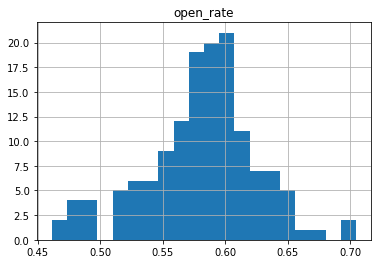

In [51]:
messages['open_rate'] = messages['unique_opens'] / messages['send_count']
messages['click_rate'] = messages['unique_clicks'] / messages['send_count']

messages[messages['send_time'] > '2017-08-01'].hist(column='open_rate', bins=20)


In [52]:
# message subject types is the full set of things in the subject line

# made this fucntion bc stuck in nparray crap otherwise
def get_subject_type(list_of_subjects, full_content_list):
    output = []
    for item in list_of_subjects:
        _ = full_content_list['Total'][full_content_list['Listing'] == item].values
        for entry in _:
            output.append(entry)
    return output

messages['subject_types'] = content['subject_list'].apply(
    lambda x: get_subject_type(x, subject_type)
)


In [53]:
#now let's look at the same stats, based on appearance in first x listings
def try_to_get_secondary(obj, i):
    try:
        _ = obj[i].split(" - ")[1]
    except (IndexError, AttributeError):
        _ = ""
    return _

def get_stats_first_n_items(messages, n):
    results_holder = []
    tmp = messages[['subject_types','send_count', 'send_time', 'unique_opens', 'unique_clicks', 'open_rate', 'click_rate', 'unsubs']]
    for i in range(0,n):
        tmp['secondary_values'] = tmp['subject_types'].apply(lambda x: try_to_get_secondary(x,i))
        results_holder.append(tmp.copy(deep=True))
    return results_holder


In [54]:
# set N
data_n_items = pd.concat(get_stats_first_n_items(messages, 3), ignore_index=True)

/Users/josh.laurito/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [57]:
data_n_grouped = data_n_items[data_n_items['send_time']> '2017-08-01'][
    ['secondary_values', 'send_count', 'unique_opens', 'unique_clicks', 'open_rate', 'click_rate', 'unsubs']
].groupby('secondary_values').sum()

tmp = data_n_items[data_n_items['send_time']> '2017-08-01'][
    ['secondary_values', 'send_count', 'unique_opens', 'unique_clicks', 'open_rate', 'click_rate', 'unsubs']
].groupby('secondary_values').size()

data_n_grouped = data_n_grouped.join(pd.DataFrame(tmp)).reset_index()

data_n_grouped['weighted_open_rate'] = data_n_grouped['unique_opens'] / data_n_grouped['send_count']
data_n_grouped['weighted_click_rate'] = data_n_grouped['unique_clicks'] / data_n_grouped['unique_opens']
data_n_grouped['weighted_unsub_rate'] = data_n_grouped['unsubs'] / data_n_grouped['send_count']
data_n_grouped['open_rate'] = data_n_grouped['open_rate'] / data_n_grouped[0]
data_n_grouped['click_rate'] = data_n_grouped['click_rate'] / data_n_grouped[0]

data_n_grouped.sort_values('open_rate', ascending=False)
# looks like some impacts here

,secondary_values,send_count,unique_opens,unique_clicks,open_rate,click_rate,unsubs,0,weighted_open_rate,weighted_click_rate,weighted_unsub_rate
21,Privacy,873,571,234,0.654545,0.270305,3,2,0.654066,0.409807,0.003436
9,Design,366,233,99,0.636612,0.270492,1,1,0.636612,0.424893,0.002732
14,Legal/Ethical,7026,4243,1792,0.610435,0.257756,9,10,0.603900,0.422343,0.001281
2,Application,2799,1637,672,0.600083,0.260507,4,4,0.584852,0.410507,0.001429
24,Sports,10561,6227,2681,0.598380,0.261331,16,15,0.589622,0.430544,0.001515
16,Media,27668,16291,6849,0.598325,0.253383,40,43,0.588803,0.420416,0.001446
4,Author,4048,2395,1063,0.592163,0.264691,6,5,0.591650,0.443841,0.001482
20,Politics,6412,3752,1539,0.588674,0.249341,10,8,0.585153,0.410181,0.001560
0,,9524,5497,2117,0.587221,0.230029,30,11,0.577173,0.385119,0.003150
23,Software,32526,18904,7636,0.585105,0.242785,36,44,0.581197,0.403936,0.001107


In [74]:
# amount of time from previous send
messages['time_from_last_send'] = pd.to_datetime(messages['send_date'].diff(-1))


/Users/josh.laurito/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  


In [76]:
messages['time_from_last_send'] 

0     1970-01-11 00:08:24
1     1970-01-08 00:28:41
2     1970-01-07 23:39:51
3     1970-01-13 22:57:21
4     1970-01-07 20:55:44
              ...        
203   1970-01-07 23:50:59
204   1970-01-07 23:47:55
205   1970-01-03 20:43:51
206   1970-01-01 04:08:08
207                   NaT
Name: time_from_last_send, Length: 208, dtype: datetime64[ns]

In [79]:
# graph time 
tmp = messages[messages['send_date'] > '2017-01-01']
open_by_time_since_last = figure(
    title="Opens By Time Since Previous Send",
    x_axis_type='datetime', 
    plot_height = 300, 
    plot_width = 500
)
open_by_time_since_last.circle(
    tmp['time_from_last_send'], 
    tmp['open_rate'], 
    color = tmp['color'],
    size = [7] * len(tmp))
show(open_by_time_since_last)

In [103]:
# hard to interpret the above, aiming for boxplot by date
messages['date_from_last_send'] = messages['time_from_last_send'].apply(lambda x: x.round('D'))

In [124]:
tmp = messages[
    ['subject_types',
     'send_count', 
     'send_time', 
     'unique_opens', 
     'unique_clicks', 
     'open_rate', 
     'click_rate', 
     'unsubs',
     'date_from_last_send'
    ]
]
tmp['cnt'] = 1

days_since_send = tmp[messages['send_time'] > '2017-01-01'].groupby('date_from_last_send').sum().reset_index()
days_since_send['open_rate'] = days_since_send['unique_opens'] / days_since_send['send_count']
days_since_send['click_rate'] = days_since_send['unique_clicks'] / days_since_send['send_count']
#days_since_send

open_by_date_since_last = figure(
    title="Opens By Days Since Previous Send",
    x_axis_type='datetime', 
    plot_height = 300, 
    plot_width = 500
)
open_by_date_since_last.circle(
    days_since_send['date_from_last_send'], 
    days_since_send['open_rate'], 
#     color = days_since_send['color'],
    size = [7] * len(tmp))
show(open_by_date_since_last)



/Users/josh.laurito/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [126]:
days_since_send

,date_from_last_send,send_count,unique_opens,unique_clicks,open_rate,click_rate,unsubs,cnt
0,1970-01-06,3466,1872,780,0.540104,0.225043,3,5
1,1970-01-07,8812,5230,2204,0.593509,0.250113,18,14
2,1970-01-08,49525,28506,11750,0.575588,0.237254,70,77
3,1970-01-09,17564,10429,4268,0.593771,0.242997,22,22
4,1970-01-10,8113,4840,2029,0.596573,0.250092,7,12
5,1970-01-11,12947,7438,3038,0.574496,0.234649,21,14
6,1970-01-12,1344,784,349,0.583333,0.259673,4,2
7,1970-01-13,1137,683,269,0.600704,0.236588,3,2
8,1970-01-14,5421,3133,1249,0.577938,0.230400,1,6
9,1970-01-15,5008,2638,1122,0.526757,0.224042,8,5


In [207]:
messages['day_number'] = messages['send_date'].dt.dayofweek
messages['day_of_week'] = messages['send_date'].dt.day_name()

In [220]:
tmp = messages[
    ['subject_types',
     'send_count', 
     'send_time', 
     'unique_opens', 
     'unique_clicks', 
     'open_rate', 
     'click_rate', 
     'unsubs',
     'day_of_week',
    'day_number']
]
send_date = tmp[messages['send_time'] > '2017-01-01'].groupby('day_of_week').sum().reset_index()
send_date['open_rate'] = send_date['unique_opens'] / send_date['send_count']
send_date['click_rate'] = send_date['unique_clicks'] / send_date['send_count']

day_names_full = cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=day_names_full, ordered=True)
send_date['day_of_week'] = send_date['day_of_week'].astype(cat_type)

send_date.sort_values('day_of_week', inplace=True)
send_date

,day_of_week,send_count,unique_opens,unique_clicks,open_rate,click_rate,unsubs,day_number
1,Monday,27307,16239,7005,0.594683,0.256528,34,0
5,Tuesday,14584,8534,3599,0.585162,0.246777,30,21
6,Wednesday,10222,6201,2646,0.606633,0.258853,6,32
4,Thursday,21016,12170,4987,0.579083,0.237295,27,84
0,Friday,42610,23771,9564,0.557874,0.224454,68,208
2,Saturday,1737,999,323,0.575130,0.185953,2,10
3,Sunday,1266,730,262,0.576619,0.206951,4,6


In [221]:
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
send_date_fig = figure(
    title="Average Open & Click Rates by Date Sent",
    x_range=day_names, 
    plot_height = 400, 
    plot_width = 600
)
send_date_fig.circle(
    day_names, 
    send_date['open_rate'], 
    color = 'red',
    size = [7] * len(send_date))

send_date_fig.circle(
    day_names, 
    send_date['click_rate'], 
    color = 'black',
    size = [7] * len(send_date))
show(send_date_fig)

In [222]:
messages['hour_of_day'] = messages['send_date'].apply(lambda x: x.hour)

In [224]:
tmp = messages[
    ['subject_types',
     'send_count', 
     'send_time', 
     'unique_opens', 
     'unique_clicks', 
     'open_rate', 
     'click_rate', 
     'unsubs',
     'hour_of_day']
]
tmp['cnt'] = 1
send_date = tmp[messages['send_time'] > '2017-01-01'].groupby('hour_of_day').sum().reset_index()
send_date['open_rate'] = send_date['unique_opens'] / send_date['send_count']
send_date['click_rate'] = send_date['unique_clicks'] / send_date['send_count']

send_date.sort_values('hour_of_day', inplace=True)
send_date

/Users/josh.laurito/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,hour_of_day,send_count,unique_opens,unique_clicks,open_rate,click_rate,unsubs,cnt
0,0,1182,733,268,0.620135,0.226734,1,3
1,1,333,231,98,0.693694,0.294294,1,1
2,9,2064,1223,446,0.592539,0.216085,1,2
3,10,2479,1457,620,0.587737,0.250101,3,3
4,11,11585,6766,2837,0.584031,0.244886,12,14
5,12,27834,15800,6559,0.567651,0.235647,43,31
6,13,37987,21548,8712,0.567247,0.229342,62,46
7,14,13496,7654,3313,0.567131,0.245480,15,22
8,15,6241,3771,1590,0.604230,0.254767,10,14
9,16,2506,1541,616,0.614924,0.245810,4,5


## What gets clicked

In [5]:
links['click_rate'] = links['total_clicks'] / links['unique_opens']

In [19]:
#links[['url','total_clicks', 'unique_opens','send_count','click_rate']].sort_values('total_clicks', ascending=False).head(30)
#[i for i in links.sort_values('total_clicks', ascending=False)['url'].head(6)]

[i for i in links[links['unique_opens'] > 500].sort_values('click_rate', ascending=False)['url'].head(6)]


['https://www.inputmag.com/tech/ibm-will-offer-free-cobol-training-to-address-overloaded-unemployment-systems',
 'http://Our remote work future is going to suck',
 'https://boards.greenhouse.io/aclu/jobs/4874603002',
 'https://en.wikipedia.org/wiki/Tzadikim_Nistarim#Their_purpose',
 'https://codeascraft.com/2019/10/02/engineering-career-development-at-etsy/',
 'https://revel.bamboohr.com/jobs/view.php?id=37']